<a href="https://colab.research.google.com/github/tamalriku/Flowise/blob/main/Linear_Regression_Prediction_with_GUI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

from google.colab import files #Upload data file
uploaded = files.upload()



Saving Salary_dataset.csv to Salary_dataset (1).csv


In [ ]:
# Read Dataset

data = pd.read_csv("Salary_dataset.csv")
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


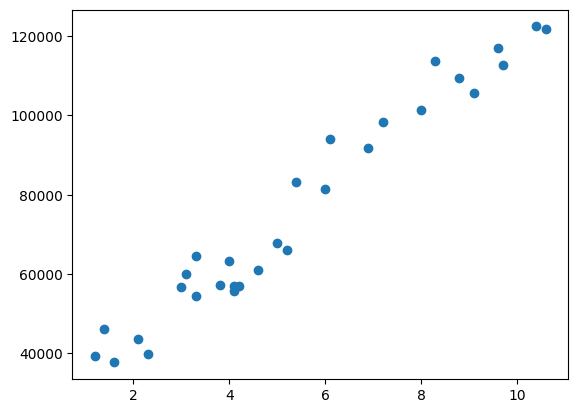

In [ ]:
#Scatter Plot of data

import matplotlib.pyplot as plt

plt.scatter(data['YearsExperience'], data['Salary'])
plt.show()

In [ ]:
# Store feature value in x and target value in y

X = data[['YearsExperience']]
y = data['Salary']

In [ ]:
# Training data/Test data Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
# Training the model using the train data

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Check model prediction on train set

model.score(X_train, y_train)


0.9553880313075513

In [ ]:
# Check model prediction on test set

model.score(X_test, y_test)

0.9347210011126783

In [ ]:
# Compareing Results

y_pred = model.predict(X_test)
y_pred

array([115440.88180109,  71397.10622651, 102321.45928951,  75145.51265839,
        55466.37889103,  60151.88693088, 122000.59305688, 107006.96732936])

In [ ]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
27,112636.0,115440.881801
15,67939.0,71397.106227
23,113813.0,102321.459290
17,83089.0,75145.512658
8,64446.0,55466.378891
9,57190.0,60151.886931
28,122392.0,122000.593057
24,109432.0,107006.967329


In [ ]:
model.predict([[9]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([108881.1705453])

In [ ]:
import joblib

joblib.dump(model, 'Linear_Regression')

model = joblib.load('Linear_Regression')

In [ ]:
# GUI

X  = data[['YearsExperience']]
y= data['Salary']

model = LinearRegression()
model.fit(X,y)

import joblib
joblib.dump(model,'model_joblib')

model = joblib.load('model_joblib')

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Create a text input widget for 'YearsExperience'
years_input = widgets.FloatText(
    value=0.0,
    description='Years of Experience:',
    disabled=False
)

# Create an output widget to display the prediction
output = widgets.Output()

# Create a button to trigger the prediction
predict_button = widgets.Button(
    description='Predict Salary'
)

# Define the prediction function
def on_predict_button_clicked(b):
    with output:
        output.clear_output()  # Clear previous output
        try:
            years = years_input.value
            # The model expects a 2D array-like input
            prediction = model.predict([[years]])
            print(f"Predicted Salary: {prediction[0]:,.2f}")
        except Exception as e:
            print(f"Error during prediction: {e}")

# Link the button click to the prediction function
predict_button.on_click(on_predict_button_clicked)

# Display the widgets
display(years_input, predict_button, output)

FloatText(value=0.0, description='Years of Experience:')

Button(description='Predict Salary', style=ButtonStyle())

Output()